# S&P 500 Data Exploratory Analysis

As a college student interested in investing, I chose to study the S&P 500's historical data. Inspired by Warren Buffett's advice in 'Guide to Wise Investing' to invest gradually in a broad index, I'm examining whether this strategy proves effective over time. 

### Market Basics

The stock market consists of various exchanges, such as the New York Stock Exchange and Nasdaq. These exchanges connect buyers and sellers, facilitating the trade of stock shares while tracking the supply, demand, and consequently, the stock's price. 

Market indexes like the S&P 500, Nasdaq composite, and Dow Jones Industrial Average, measure the performance of certain stock groups. These groups may represent the entire market or specific sectors like technology or retail. These indexes are commonly referenced as indicators of the market's overall health.

Investment strategies are generally categorized into two types: active and passive.

### Active Investing
Active investing is a hands-on approach where skilled stock analysts use their insights to buy and sell stocks actively, aiming to outperform the general market and indexes by achieving higher returns or lower risk.

### Passive Investing
In contrast, passive investing adopts a more long-term approach, capitalizing on the market's overall growth over time. This method is less prone to errors since it avoids making hasty decisions based on market fluctuations.

The simplest way to engage in passive investing is by investing in index funds that track major indexes like the S&P 500, Dow Jones, or Russell 2000. These funds aggregate capital from various investors to purchase a mix of stocks, bonds, or securities comprising the relevant index. When the index updates its components, these index funds adjust their holdings accordingly.

In this code, I will conduct data exploratory analysis on the S&P 500 index.

The CSV file contains data from 2000 to 2022, focusing on the **Close** column to represent the **price** on a given day.

To calculate the **return** of buying an index at time $t_1$ and selling at $t_2$, use the formula:
$$r_{t_1,t_2} = \frac{P_{t_2} - P_{t_1}}{P_{t_1}}$$
Here, $P$ denotes the price.

For assessing the return over a specific period $T$, the formula is:
$$r_{t,T} = \frac{P_{t+T} - P_{t}}{P_{t}}$$
where $t$ is the purchase date and $T$ is the duration of holding. Exclude non-trading days in calculating ${t+T}$.

Consider the return as a variable to determine risk through its standard deviation. Risk-averse investors prefer a return with low volatility.


### Sharpe Ratio {-}

People like high return and low risk investment. However, in the market high return always associates high risk (e.g. stock) and low risk means low return (e.g. treasury bonds). 

The Sharpe ratio compares the excess return of an investment with its risk to make a single measure:
$$SR=(R-R_f)/\sigma$$
where $R$ and $\sigma$ are the expected return and stddev for the investment and $R_f$ is the risk free rate. 

Risk free rate is the rate of return offered by an investment that carries zero risk. In reality there is no truly risk free rate, but we usually take something like three-month U.S. Treasury bill as a proxy as risk free rate.
To be simple, I **take risk free rate as 0**. 


### Data Organization

In [1]:
import pandas as pd
sp500 = pd.read_csv('sp500.csv')
sp500.dropna()
sp500 = sp500.sort_values(by = 'Date', ascending = True)
sp500

,Date,Open,High,Low,Close
2157,2000-07-25,1474.47,1476.26,1464.29,1474.47
2660,2000-07-26,1452.42,1474.47,1452.42,1452.42
1964,2000-07-27,1449.62,1464.75,1445.30,1449.62
1891,2000-07-28,1419.89,1456.35,1414.16,1419.89
2756,2000-07-31,1430.83,1437.63,1418.26,1430.83
...,...,...,...,...,...
1170,2022-10-17,3677.95,3689.73,3677.95,3677.95
2862,2022-10-18,3746.26,3762.79,3686.53,3719.98
963,2022-10-19,3703.11,3728.58,3666.51,3695.16
4342,2022-10-20,3689.05,3736.00,3656.44,3665.78


## Return on investment

### Daily Investor

For impatient investors who hold the index for a day, I will show the histogram graph for all the possible returns. 

#### I will also answer the following questions:

What is the expected return, risk and sharpe ratio? 

Is the return significantly greater than zero (a.k.a positive return) (use a threshold 0.01 for $p$-value) ?


**Returns Histogram:**

In [33]:
sp500 ['Returns'] = (sp500.iloc[:,-2]/sp500.iloc[:,-2].shift(periods = 1))-1

sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500.dropna()


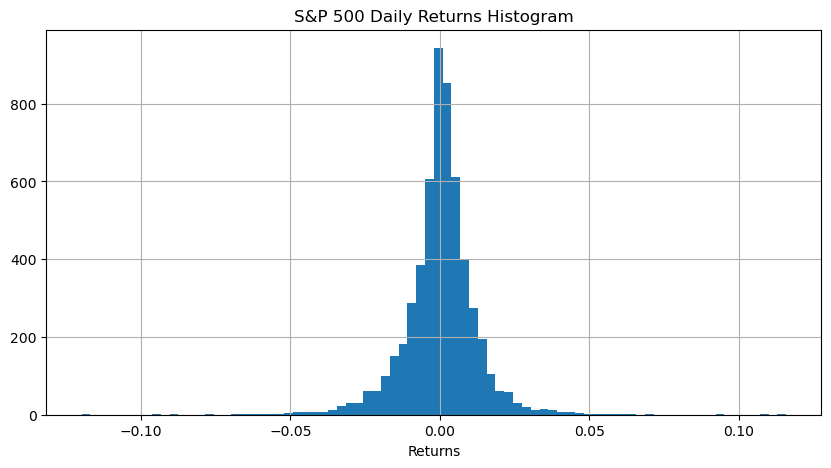

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.hist(x='Returns', data=sp500, bins = 80)
plt.title('S&P 500 Daily Returns Histogram')
plt.xlabel('Returns')
plt.grid(True)

**Expected Return, Risk, and Sharpe Ratio:**

In [40]:
from scipy import stats

null_hypothesis_mean = 0

t_stat, p_value = stats.ttest_1samp(sp500 ['Returns'], popmean=null_hypothesis_mean, alternative='greater')

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

print('P Value:', p_value)
print('Mean:', sp500 ['Returns'].mean())
print('Risk:',sp500 ['Returns'].std())
print('Sharpe Ratio:',sp500['Returns'].mean()/sp500 ['Returns'].std())


Fail to reject the null hypothesis
P Value: 0.07066997605887224
Mean: 0.00024419162038510564
Risk: 0.012419029768756617
Sharpe Ratio: 0.01966269708117093


We fail to reject the null hypothesis. There isn't enough statistical evidence to conclude that the return is significantly greater than zero

### Yearly Investor

Suppose there is an investor who will hold the index for a year. The NYSE and NASDAQ average about 250 trading days a year, so let's suppose there are 250 trading days in a year. 

Let's do the same analysis as the above:

### Histogram:

In [130]:
import pandas as pd
sp500_yearly = pd.read_csv('sp500.csv')
sp500_yearly = sp500_yearly.sort_values(by = 'Date', ascending = True)
sp500_yearly['Date'] = pd.to_datetime(sp500_yearly['Date'])

sp500_yearly['Annual Returns'] = (sp500_yearly.iloc[:,-2]/sp500_yearly.iloc[:,-2].shift(periods = 250))-1
#sp500_yearly = sp500_yearly.dropna()
sp500_yearly['Annual Returns'].mean()
#sp500_yearly['Annual Returns'].std()

0.07133201891124846

In [132]:
sp500_yearly.head(250)

,Date,Open,High,Low,Close,Annual Returns
2314,2001-07-23,1191.03,1215.22,1190.50,1191.03,-0.186978
1109,2001-07-24,1171.65,1191.03,1165.54,1171.65,-0.197519
15,2001-07-25,1190.49,1190.52,1171.28,1190.49,-0.189594
1555,2001-07-26,1202.93,1204.18,1182.65,1202.93,-0.163708
613,2001-07-27,1205.82,1209.26,1195.99,1205.82,-0.156720
...,...,...,...,...,...,...
1314,2002-07-18,881.56,907.66,880.71,881.56,-0.266106
4848,2002-07-19,847.76,881.56,842.14,847.76,-0.295952
1814,2002-07-22,819.85,853.90,813.54,819.85,-0.321105
181,2002-07-23,797.70,827.63,796.24,797.70,-0.339658


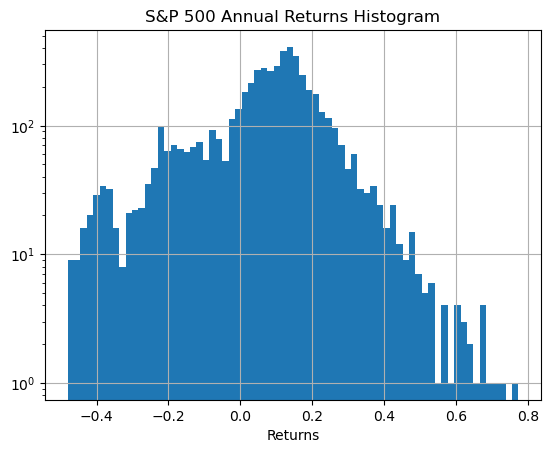

In [85]:
import matplotlib.pyplot as plt

sp500_yearly.hist(column='Annual Returns', bins = 70)
plt.title('S&P 500 Annual Returns Histogram')
plt.xlabel('Returns')
plt.yscale('log')
plt.grid(True)

**Expected Return, Risk, and Sharpe Ratio:**

In [78]:
null_hypothesis_mean = 0

t_stat, p_value = stats.ttest_1samp(sp500_yearly['Annual Returns'], popmean=null_hypothesis_mean, alternative='greater')

alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

print('P Value:', p_value)
print('Mean:', sp500_yearly ['Annual Returns'].mean())
print('Risk:',sp500_yearly ['Annual Returns'].std())
print('Sharpe Ratio:',sp500_yearly['Annual Returns'].mean()/sp500_yearly['Annual Returns'].std())


Reject the null hypothesis
P Value: 2.5100901648786045e-187
Mean: 0.07133201891124846
Risk: 0.17177360953196066
Sharpe Ratio: 0.4152676252516906


We reject the null hypothesis. 

There is enough statistical evidence to conclude that the return is significantly greater than zero. Don't be impatient with holding your stocks.

### From daily to yearly 

Now let's explore how the expected return/risk/shape ratio changes as one increases his or her holding period from 1 day to 1 year (250 days).

#### 
At least how many days do you need to hold the index in order to make a significant positive return (threshold 0.01)?

#### 
How are the returns associated with the risks for different investment strategies?

In [311]:
p_values = []
means =[]
risks = []
sharpe_ratios = []

null_hypothesis_mean = 0

for i in range(1,250):
    returns = (sp500_yearly.iloc[:,-2]/sp500_yearly.iloc[:,-2].shift(periods = i))-1
    returns = returns.dropna()
    p_value = stats.ttest_1samp(returns, popmean=null_hypothesis_mean, alternative='greater')
    p_values.append(p_value)
    means.append(returns.mean())
    risks.append(returns.std())
    sharpe_ratio =returns.mean()/returns.std()
    sharpe_ratios.append(sharpe_ratio)

days = None

for day, p_value_result in enumerate(p_values, start=1):
    p_value = p_value_result.pvalue
    if p_value <= 0.01:
        days = day
        break
        
if days is not None:
    print(f"You need to hold the index for at least {days+1} days to make a significant positive return.")
else:
    print("Error")

You need to hold the index for at least 3 days to make a significant positive return.


### Graph

[]

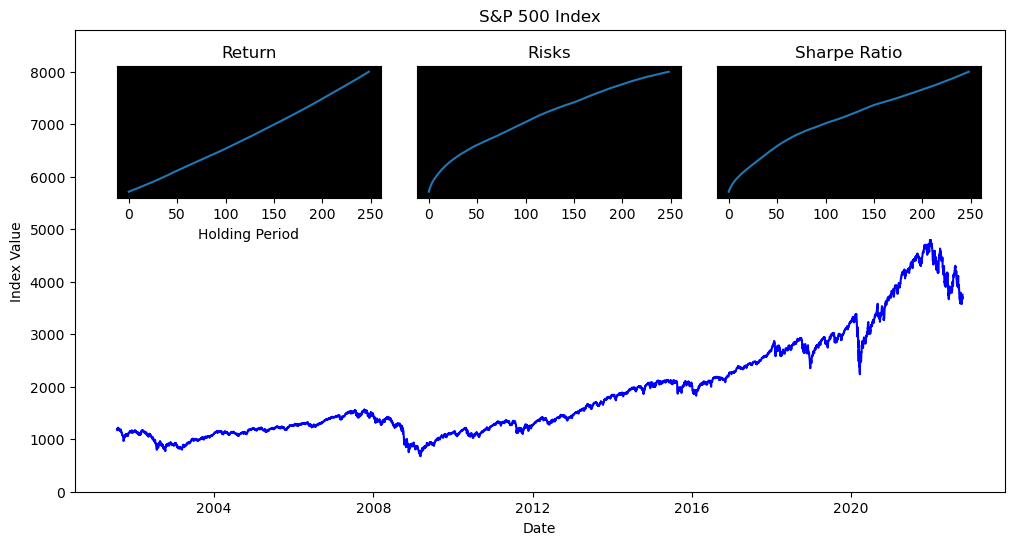

In [319]:

# S&P 500 values over time
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(sp500_yearly.index, sp500_yearly.iloc[:,-2], color='blue', label='S&P 500')
ax1.set_title('S&P 500 Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index Value')
ax1.set_ylim(0, 8800)

#returns
plot_1 = means
a = plt.axes([.16, .6, .22, .22], facecolor='000000')
plt.plot(plot_1)
plt.title('Return')
plt.xlabel('Holding Period')
a.set_yticks([])

#risks
plot_2=risks
a = plt.axes([.41, .6, .22, .22], facecolor='000000')
plt.plot(plot_2)
plt.title('Risks')
a.set_yticks([])

#sharpe ratio
plot_3=sharpe_ratios
a = plt.axes([.66, .6, .22, .22], facecolor='000000')
plt.plot(plot_3)
plt.title('Sharpe Ratio')
a.set_yticks([])


In [218]:
#| echo: false

# import image module
from IPython.display import Image

# get the image
Image(url="bonus.jpg",width=675)

# Key Takeaways

As of January 19th, 2024, the S&P 500 just hit a record high. The S&P topped out at 4,842 Friday afternoon, narrowly beating January 2022’s prior all-time high of 4,818. Exciting news. 

#### Anyway, the takeaway for this data exploratory analysis are the following:

Investing with a long-term outlook can be more rewarding than short-term trading. 

The power of compounding a significant advantage of long-term investing. Returns that are reinvested can generate their own returns, potentially increasing wealth over time.

It's challenging to time the market accurately for short-term gains consistently. The data suggests that even a holding period as short as three days can start to mitigate this difficulty.